# Reinforcement Learning on Grid World

Starter Code for **pygw** module (GITHUB: [RL-GridWorld](https://github.com/Nelson-iitp/RL-GridWorld) )

# [ GLOBAL SECTION ]

In [1]:
import random, datetime, copy
import numpy as np
import matplotlib.pyplot as plt

import pygw
from pygw.common import get_random_range, int2base, base2int, strA, strD
from pygw.common import MDLOG
from pygw.model import WORLD, ENV
import pygw.worlds as worlds
import pygw.nets as nets
from pygw.agents.dqn import AGENT as DQN
from pygw.agents.tql import AGENT as TQL
from pygw.agents.basic import AGENT as BASIC
strdone = '\n----------------------------\nDone!\n----------------------------'

print(datetime.datetime.now().strftime("%d-%B-%Y, %A :: %H:%m"), strdone)

16-August-2021, Monday :: 20:08 
----------------------------
Done!
----------------------------


# [ Create / Load a WORLD ]

In [2]:
world = worlds.TEMPLATE() #<<-- world creation can be manually implemented as well, refer the TEMPLATE function
print(world.name)
print(strD(world.__dict__))

Template World
=-=-=-=-==-=-=-=-=
name		Template World
R		6
C		7
SP		[0, 0]
EP		[5, 6]
RNDSP		False
RNDEP		False
EMPTY		-1
RRP		[5, 10]
RRN		[-10, -5]
RD		0.3
PRD		0.5
ER		0
=-=-=-=-==-=-=-=-=



# [ Create ENV ]

###  Can set these ENV variables
```
        #--------------------->># render() related variables
        self.FIGSR = 0.8        # figsize argument for plt
        self.cmap = 'PiYG'      # cmap for imshow()
        self.spcol = 'green'    # color (start position)
        self.epcol = 'red'      # color (end position)
        self.ccol = 'black'     # color (current position)
        self.acol = 'tab:grey'  # color (arrow)
        
        #--------------------->># timestep limits (max moves upper bound)
        self.max_ts = (self.R*self.C)*10              # max timesteps during TRAINING
        self.max_ts_test = (self.R*self.C)*2          # max timesteps during TESTING
 ```

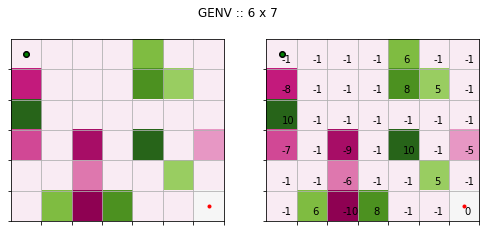

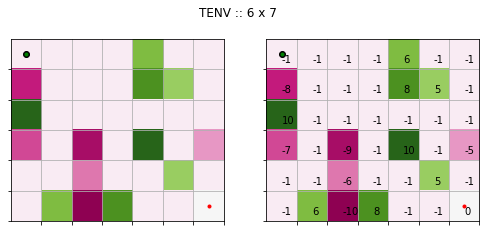

In [3]:
env = ENV(world, name="GENV")      #<<--- create new environment

Tenv = ENV(world, name="TENV")      #<<--- create another new environment
np.copyto(Tenv.Si, env.Si)          #<<---       ... copy it from first one
Tenv.reset()                        #<<---       ... shall be used later


# set some ENV variables if required
env.FIGSR = 0.6    #<<--- smaller figsize
Tenv.FIGSR = 0.6   #<<--- smaller figsize
#env.cmap = 'summer'
#env.spcol = 'tab:purple'

# render both environment 
env.render( mode=1, caption=env.name+" :: " + str(env.R)+" x "+str(env.C))
Tenv.render( mode=1, caption=Tenv.name+" :: " + str(env.R)+" x "+str(env.C))

# [ Test Simulate with BASIC agent ]

Test Policy: [1, 1, 3, 3, 2, 2, 0, 0]
Testing agent { agent_pie } on env [ GENV ]
1  --> Action: 1 Current Reward: -1 Cummulative Reward: -1  Final State? [ False ]
2  --> Action: 1 Current Reward: -1 Cummulative Reward: -2  Final State? [ False ]
3  --> Action: 3 Current Reward: -1 Cummulative Reward: -3  Final State? [ False ]
4  --> Action: 3 Current Reward: -1 Cummulative Reward: -4  Final State? [ False ]
5  --> Action: 2 Current Reward: -1 Cummulative Reward: -5  Final State? [ False ]
6  --> Action: 2 Current Reward: 10 Cummulative Reward: 5  Final State? [ False ]
7  --> Action: 0 Current Reward: -8 Cummulative Reward: -3  Final State? [ False ]
8  --> Action: 0 Current Reward: -1 Cummulative Reward: -4  Final State? [ False ]
9  --> Action: -1 Current Reward: 0 Cummulative Reward: -4  Final State? [ True ]


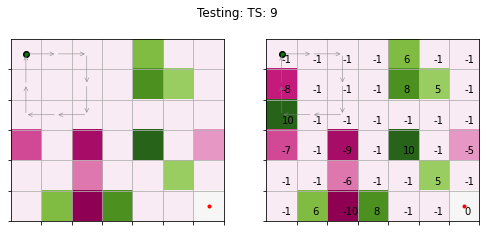

Action Sequence: [1, 1, 3, 3, 2, 2, 0, 0, -1]
Total Reward: -4

----------------------------
Done!
----------------------------
Action Sequence: [1, 1, 3, 3, 2, 2, 0, 0, -1]
Reward Sequence: [-1, -1, -1, -1, -1, 10, -8, -1, 0]
Total Reward: -4


In [4]:
# define basic agent - this agent is not a learner - only for simulation
basic_agt = BASIC(env=env)

# give it an action sequence (test_pie) to simulate
test_pie = [1,1,3,3,2,2,0,0] 
# other wise generate a random action sequence using 
#    test_pie = np.random.randint(0,env.A, size=env.R+env.C)
print('Test Policy:', test_pie)

basic_agt.set_pie(test_pie) #<<--- set action sequence on agent

# begin testing by calling env.test()
pie, rew, trew, _ = env.test(
             basic_agt,                   #<---- agent
             #reset_env=True,             #<---- reset env beofre start testing
             #return_info=False,          #<---- return the 'Info' variable along with reward
             verbose=3,                   
             mode=1,                      #<---- mode for render() function
             last_render_only=True,       #<---- if True, renders only the last state
             rprint=print                 #<<--- std-out
            )

# print returned action sequence
print(strdone)
print('Action Sequence:', pie)
print('Reward Sequence:', rew)
print('Total Reward:', trew)

# [ Find Optimal Policy using Traditional Q-Learning  ]

States discovered: 26367
Testing agent { agent_tql } on env [ GENV ]
1  --> Action: 1 Current Reward: -1 Cummulative Reward: -1  Final State? [ False ]
2  --> Action: 1 Current Reward: -1 Cummulative Reward: -2  Final State? [ False ]
3  --> Action: 1 Current Reward: -1 Cummulative Reward: -3  Final State? [ False ]
4  --> Action: 1 Current Reward: 6 Cummulative Reward: 3  Final State? [ False ]
5  --> Action: 3 Current Reward: 8 Cummulative Reward: 11  Final State? [ False ]
6  --> Action: 1 Current Reward: 5 Cummulative Reward: 16  Final State? [ False ]
7  --> Action: 2 Current Reward: -1 Cummulative Reward: 15  Final State? [ False ]
8  --> Action: 3 Current Reward: -1 Cummulative Reward: 14  Final State? [ False ]
9  --> Action: 3 Current Reward: 10 Cummulative Reward: 24  Final State? [ False ]
10  --> Action: 1 Current Reward: -1 Cummulative Reward: 23  Final State? [ False ]
11  --> Action: 3 Current Reward: 5 Cummulative Reward: 28  Final State? [ False ]
12  --> Action: 2 Cur

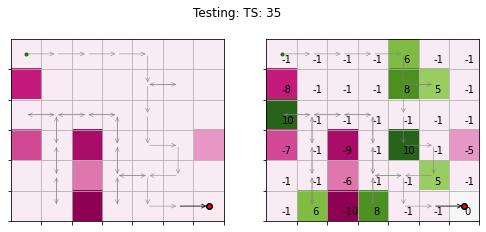

Action Sequence: [1, 1, 1, 1, 3, 1, 2, 3, 3, 1, 3, 2, 2, 3, 0, 0, 0, 2, 2, 2, 1, 3, 3, 3, 0, 0, 0, 1, 1, 3, 3, 1, 3, 1, 1]
Total Reward: 32

----------------------------
Done!
----------------------------
Action Sequence: [1, 1, 1, 1, 3, 1, 2, 3, 3, 1, 3, 2, 2, 3, 0, 0, 0, 2, 2, 2, 1, 3, 3, 3, 0, 0, 0, 1, 1, 3, 3, 1, 3, 1, 1]
Reward Sequence: [-1, -1, -1, 6, 8, 5, -1, -1, 10, -1, 5, -1, -1, 8, -1, -1, -1, -1, -1, 10, -1, -1, -1, 6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0]
Total Reward: 32
Elapsed time = 0:01:26.290956


In [9]:
#*********************************************************
timestamp_start = datetime.datetime.now()
#*********************************************************

tql_agt = TQL(env=env)
tql_agt.train(M=500_000, lr=0.5, dis=0.99, epsilon=0.5, clear_Q=True, reset_env=True)
print('States discovered:', len(tql_agt.Q))
pie, rew, trew, _ = env.test(tql_agt,
             reset_env=True, 
             return_info=False, 
             verbose=3, mode=1, last_render_only=True, rprint=print)
print(strdone)
print('Action Sequence:', pie)
print('Reward Sequence:', rew)
print('Total Reward:', trew)

# strore results to compare later
TQL_RES = [pie, trew]
#*********************************************************
timestamp_dur = datetime.datetime.now() - timestamp_start
print('Elapsed time = ' + str(timestamp_dur))
#*********************************************************

# [ Find Optimal Policy using Deep Q-Learning  ]

Starting DQN training...
 <-----> .Updated TNET. 1  on episode: 29
Testing agent { agent_dqn } on env [ TENV ]


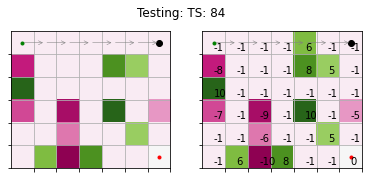

Action Sequence: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Total Reward: -77
 <-----> .Updated TNET. 2  on episode: 49
Testing agent { agent_dqn } on env [ TENV ]


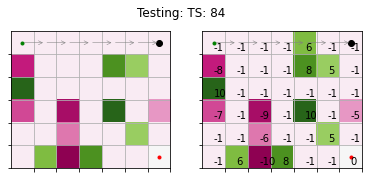

Action Sequence: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Total Reward: -77
 <-----> .Updated TNET. 3  on episode: 89
Testing agent { agent_dqn } on env [ TENV ]


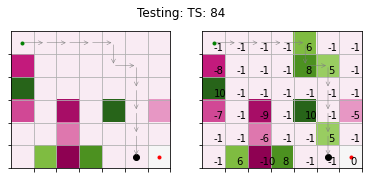

Action Sequence: [1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Total Reward: -56
 <-----> .Updated TNET. 4  on episode: 153
Testing agent { agent_dqn } on env [ TENV ]


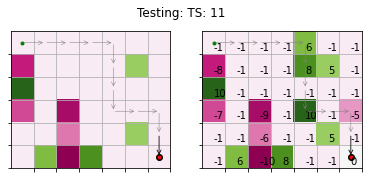

Action Sequence: [1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 3]
Total Reward: 13
 <-----> .Updated TNET. 5  on episode: 222
Testing agent { agent_dqn } on env [ TENV ]


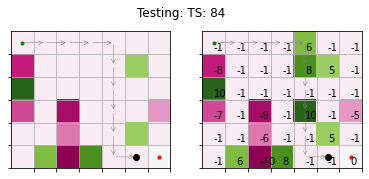

Action Sequence: [1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Total Reward: -57
 <-----> .Updated TNET. 6  on episode: 313
Testing agent { agent_dqn } on env [ TENV ]


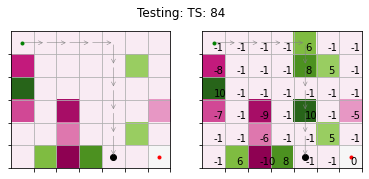

Action Sequence: [1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Total Reward: -57
 <-----> .Updated TNET. 7  on episode: 401
Testing agent { agent_dqn } on env [ TENV ]


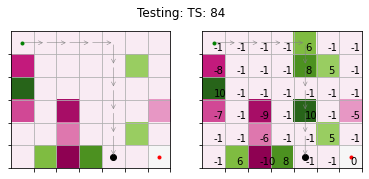

Action Sequence: [1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Total Reward: -57
 <-----> .Updated TNET. 8  on episode: 507
Testing agent { agent_dqn } on env [ TENV ]


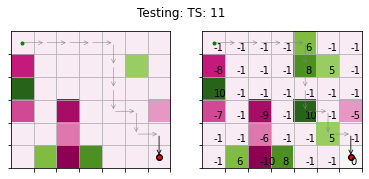

Action Sequence: [1, 1, 1, 1, 3, 3, 3, 1, 3, 1, 3]
Total Reward: 23
 <-----> .Updated TNET. 9  on episode: 586
Testing agent { agent_dqn } on env [ TENV ]


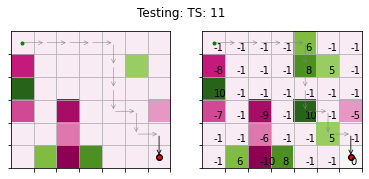

Action Sequence: [1, 1, 1, 1, 3, 3, 3, 1, 3, 1, 3]
Total Reward: 23
 <-----> .Updated TNET. 10  on episode: 769
Testing agent { agent_dqn } on env [ TENV ]


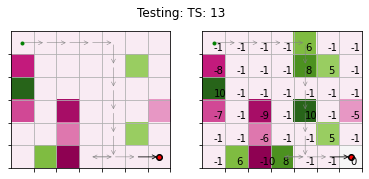

Action Sequence: [1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 1, 1, 1]
Total Reward: 24
 <-----> .Updated TNET. 11  on episode: 902
Testing agent { agent_dqn } on env [ TENV ]


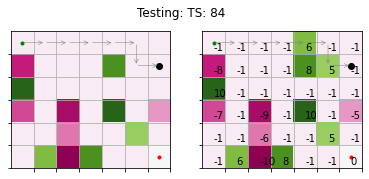

Action Sequence: [1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Total Reward: -71
 <-----> .Updated TNET. 12  on episode: 1079
Testing agent { agent_dqn } on env [ TENV ]


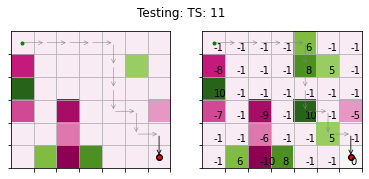

Action Sequence: [1, 1, 1, 1, 3, 3, 3, 1, 3, 1, 3]
Total Reward: 23
 <-----> .Updated TNET. 13  on episode: 1263
Testing agent { agent_dqn } on env [ TENV ]


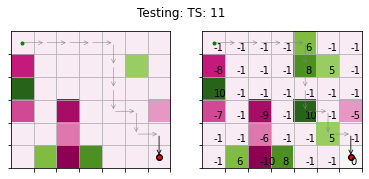

Action Sequence: [1, 1, 1, 1, 3, 3, 3, 1, 3, 1, 3]
Total Reward: 23
 <-----> .Updated TNET. 14  on episode: 1424
Testing agent { agent_dqn } on env [ TENV ]


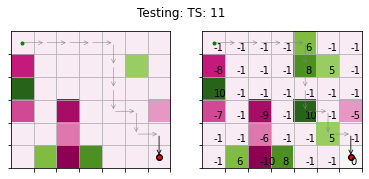

Action Sequence: [1, 1, 1, 1, 3, 3, 3, 1, 3, 1, 3]
Total Reward: 23
... Finished!

Testing agent { agent_dqn } on env [ TENV ]


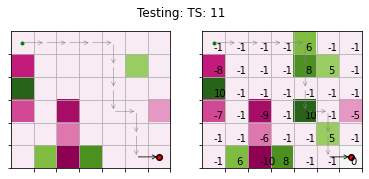

Action Sequence: [1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1]
Total Reward: 23

----------------------------
Done!
----------------------------
Total updates mades to TNET: 14
Elapsed time = 0:20:16.626390


In [6]:
#*********************************************************
timestamp_start = datetime.datetime.now()
#*********************************************************

Tenv.FIGSR = 0.45   #<<--- reduce figsize during training

dqn_agt = DQN(env_train=env, env_test=Tenv, 
              qnet=nets.DQN_D0(env.LEN, env.A, lr=0.01, layer_size=[500,200,50]))

_ , _, total_updates, tested_pies, tested_rews, tested_base_eps = \
dqn_agt.train(max_replay_memory = 512*6, 
              max_episodes = 1500, 
              dis = 0.99, 
              epsilonA = [0.05, 0.001, 0.05, 0.85, 0],
              mini_batch_size = 512 * 3,
              train_freq = (env.R+env.C)*10,
              update_freq = 30, 
              random_init_state=False,
              clear_mem=True, 
              test_on_update=True,
              verbose=1,  test_verbose=1, last_render_only=True, mode=1, rprint=print)
print(strdone)
print('Total updates mades to TNET:',total_updates)

#*********************************************************
timestamp_dur = datetime.datetime.now() - timestamp_start
print('Elapsed time = ' + str(timestamp_dur))
#*********************************************************

Tenv.FIGSR = 0.6

## [ Plot the DQN training results ]

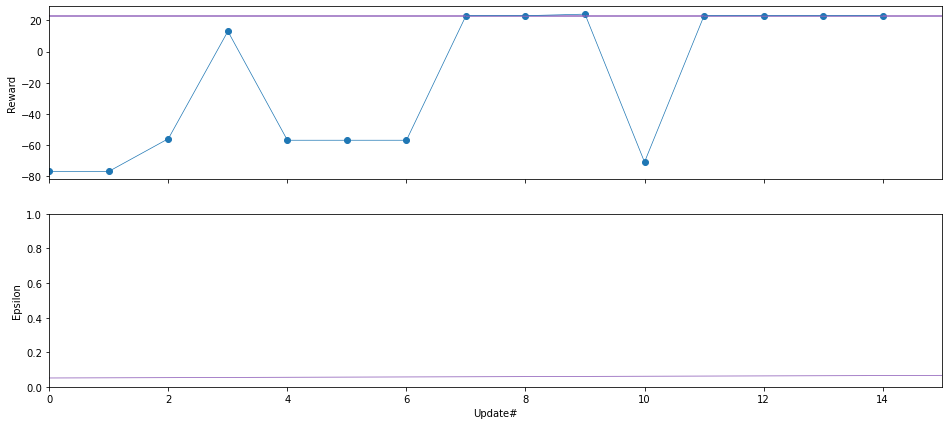

Testing agent { agent_dqn } on env [ TENV ]


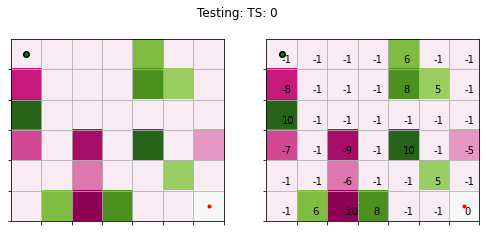

1  --> Action: 1 Current Reward: -1 Cummulative Reward: -1  Final State? [ False ]


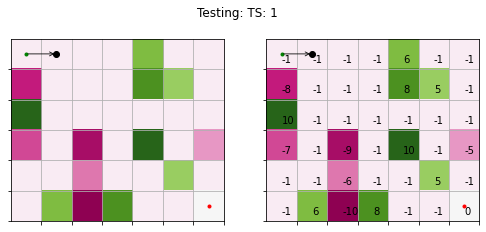

2  --> Action: 1 Current Reward: -1 Cummulative Reward: -2  Final State? [ False ]


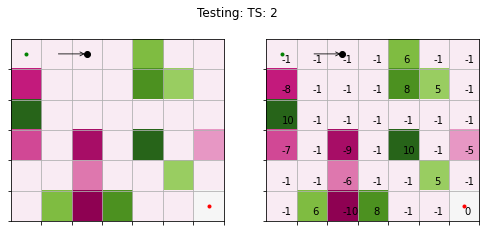

3  --> Action: 1 Current Reward: -1 Cummulative Reward: -3  Final State? [ False ]


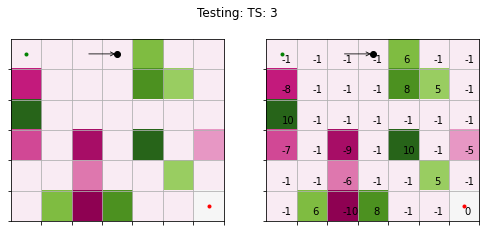

4  --> Action: 1 Current Reward: 6 Cummulative Reward: 3  Final State? [ False ]


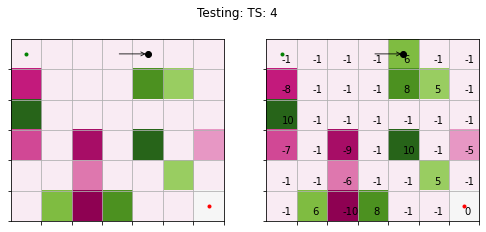

5  --> Action: 3 Current Reward: 8 Cummulative Reward: 11  Final State? [ False ]


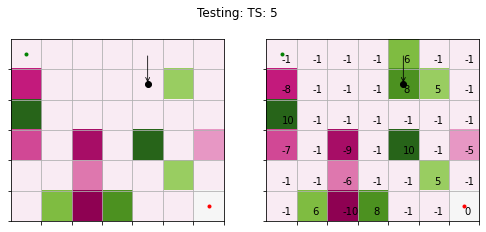

6  --> Action: 3 Current Reward: -1 Cummulative Reward: 10  Final State? [ False ]


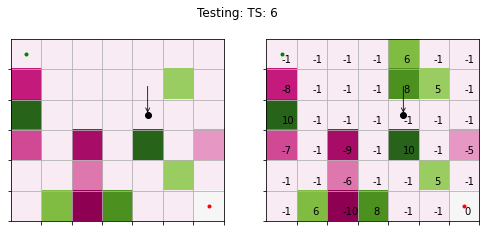

7  --> Action: 3 Current Reward: 10 Cummulative Reward: 20  Final State? [ False ]


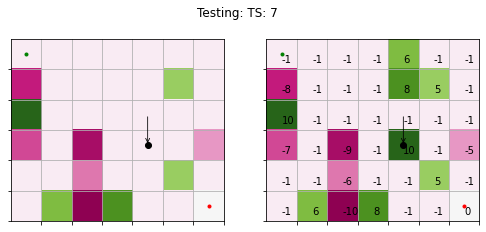

8  --> Action: 1 Current Reward: -1 Cummulative Reward: 19  Final State? [ False ]


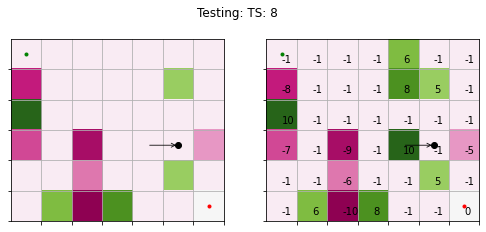

9  --> Action: 3 Current Reward: 5 Cummulative Reward: 24  Final State? [ False ]


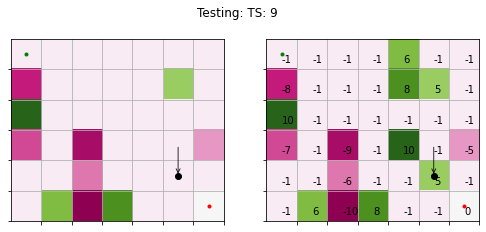

10  --> Action: 3 Current Reward: -1 Cummulative Reward: 23  Final State? [ False ]


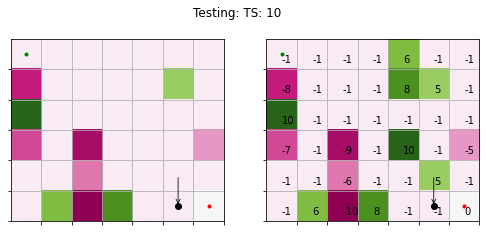

11  --> Action: 1 Current Reward: 0 Cummulative Reward: 23  Final State? [ True ]


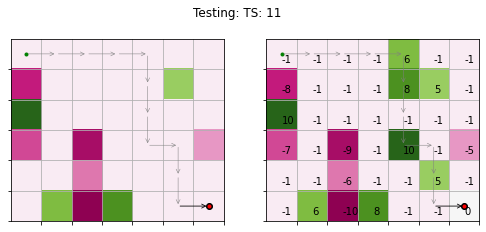

Action Sequence: [1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1]
Total Reward: 23
Action Sequence: [1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1]
Reward Sequence: [-1, -1, -1, 6, 8, -1, 10, -1, 5, -1, 0]
Total Reward: 23


In [10]:

fix,ax = plt.subplots(2,1, sharex=True, figsize=(16,7))

scatX = np.arange(0,total_updates+1,1 )

#ax[1].set_title('Epsilon Overtime')
ax[1].plot(tested_base_eps, color='tab:purple', linewidth=0.8)
ax[1].set_ylim(0,1)
ax[1].set_xlim(0,total_updates+1)
ax[1].set_ylabel('Epsilon')

#ax[0].set_title('Reward Overtime')
ax[0].plot(tested_rews, color='tab:blue', linewidth=0.7)
ax[0].scatter(scatX,tested_rews, color='tab:blue')
ax[0].hlines(tested_rews[-1], 0,total_updates+1 , color='tab:purple')
ax[0].set_xlim(0,total_updates+1)
ax[0].set_ylabel('Reward')
ax[1].set_xlabel('Update#')
plt.show()

pie, rew, trew, _ = dqn_agt.env_.test(dqn_agt,
             reset_env=True, 
             return_info=False, 
             verbose=3, mode=1, last_render_only=False, rprint=print)
print('Action Sequence:', pie)
print('Reward Sequence:', rew)
print('Total Reward:', trew)

DQN_RES = [pie, trew]

# [ Compare TQL and DQN ]

Testing agent { agent_pie } on env [ GENV ]


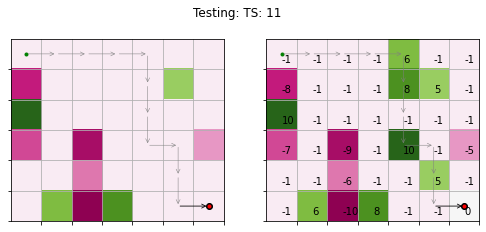

Action Sequence: [1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1]
Total Reward: 23
Testing agent { agent_pie } on env [ GENV ]


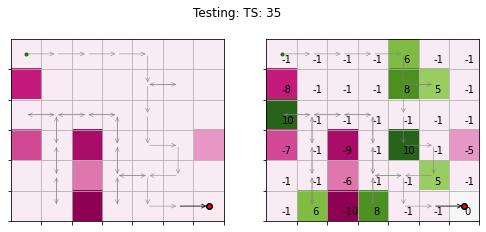

Action Sequence: [1, 1, 1, 1, 3, 1, 2, 3, 3, 1, 3, 2, 2, 3, 0, 0, 0, 2, 2, 2, 1, 3, 3, 3, 0, 0, 0, 1, 1, 3, 3, 1, 3, 1, 1]
Total Reward: 32

DQN-Policy Reward: 23
TQL-Policy Reward: 32



In [11]:
# store results to compare later - DQN_RES, TQN_RES = [pie, trew]


basic_agt.set_pie(DQN_RES[0])
pie, rew, trew, _ = env.test(basic_agt,
             #reset_env=True, 
             #return_info=False, 
             verbose=1, 
             mode=1, last_render_only=True,
             rprint=print)



basic_agt.set_pie(TQL_RES[0])
pie, rew, trew, _ = env.test(basic_agt,
             #reset_env=True, 
             #return_info=False, 
             verbose=1, 
             mode=1, last_render_only=True,
             rprint=print)


print('\n==============================================')
print('DQN-Policy Reward:', DQN_RES[1])
print('TQL-Policy Reward:', TQL_RES[1])
print('==============================================\n')

# [ ! Done ! ]